In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Important Note

For this project, I used tweepy to extract the data. Because it require some authorization to access the data, you may not be able to do same. Also, with the data you might extract, the results will not be reproducible.

So, I will leave the code here, but do not run the following cells till you see an indication to start running. 

A csv file will be attached to my submission, which you can then import to this notebook.

**Do Not Run**

In [2]:
!ls '/content/drive/MyDrive/Colab Notebooks/tokens.properties'

'/content/drive/MyDrive/Colab Notebooks/tokens.properties'


In [3]:
!pip install ConfigParser
!pip install tweepy

In [4]:
import configparser
import os
import tweepy
import pandas as pd

In [5]:
config = configparser.RawConfigParser()
config.read(filenames = '/content/drive/MyDrive/Colab Notebooks/tokens.properties')
print(config.sections())

['twitter']


In [6]:
access_token = config.get('twitter', 'access_token')
access_token_secret = config.get('twitter', 'access_token_secret')
consumer_key = config.get('twitter', 'consumer_key')
consumer_key_secret = config.get('twitter', 'consumer_secret')

In [7]:
auth = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


### Data Extraction

In [8]:
tweets = tweepy.Cursor(api.search, q = "#EndSARSMemorial -filter:retweets", lang = 'en', since = '2021-10-20', since_id = '4001').items(1000)

In [9]:
tweet_info = [[tweet.user.screen_name, tweet.text, tweet.retweet_count, tweet.user.followers_count] for tweet in tweets]

In [10]:
#Create a pandas dataframe
tweet_df = pd.DataFrame(data= tweet_info, columns= ['user', 'text', 'retweet_count', 'followers_count'])
pd.set_option('max_colwidth',800)
tweet_df.head(10)

,user,text,retweet_count,followers_count
0,RaymondEgwuchu1,@NGRPresident look at the condition of our schools in Nigeria 🤦‍♂️🤦‍♂️#EndSARSMemorial #EndPoliceBrutality… https://t.co/28BbEIp64T,1,20
1,AsmauuUsman,As of last year 20/10/2020 in Nigeria an act of violence occurred against citizen of the great nation as a result o… https://t.co/6F8shocG0h,2,0
2,atansi,Free Kemi Seba. A free Africa can not jail itself. #kemiseba #burkinafaso #EndSARSMemorial,0,50
3,neilnicholson,Seb Walker sits down with top Trump administration officials to understand what was really going on in those chaoti… https://t.co/ri57nDGhkt,1,1498
4,oluwaNishola90,@atiku @OfficialPDPNig Leave Nigerian alone we no need any rescue again sir……Let young people rule 🤝… https://t.co/y9F9OAnxeh,0,75
5,Gidiman234,"9ja leaders travel abroad, see d sites and use their amenities. them come to a general conclusion that, d shit is 2… https://t.co/VYoLEsrNaJ",2,45
6,NikkyMcutie,"Few minutes ago, I drove past the Lekki toll gate and once again, my heart broke. My heart bleeds that the toll whi… https://t.co/YoSyTvEM1s",0,126
7,XclusiveMantee,Welcome to Lagos Nigeria \n#EndSARS\n#EndSARSMemorial https://t.co/YoGICMqrPn,2,183
8,AishaYesufu,"Dear Nigerian Youth\nImagine yourselves in the 36 State Houses of Assembly, in the House of Representatives &amp; the Se… https://t.co/lpP4C1VcRu",85,906642
9,1st9ja,@SodiqTade And the Governor that gave the order. #EndSARSMemorial,0,670


In [11]:
# Write the DataFrame to CSV file.
tweet_df.to_csv('/content/drive/MyDrive/Colab Notebooks/tweet.csv', mode = 'a', index=False, header=False)

## Start Running from here

In [1]:
from google.colab import files
  
# You should now upload the tweet.csv file attached  
uploaded = files.upload()

Saving tweet.csv to tweet (1).csv


In [2]:
# Install Libraries
!pip install textblob

In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import io
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import itertools, collections
import networkx as nx

from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import bigrams
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

### Data Preprocessing

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['tweet.csv']))
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,user,text,retweet_count,followers_count
0,iamSaviourIcon,Saw this at Isolo under bridge this morning 🇳🇬...,2,56
1,OdiscoAkin98,Join me as we discuss youth involvement in Pol...,2,109
2,evedarl,Nigeria LADY from edo state críed out I can't ...,1,62
3,HotNewsNaija,#ENDSARSMEMORIAL: Together - A Poem By Ola Ola...,1,4041
4,ChimaSteven2,Are you people deaf? No election in Anambra st...,4,105


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             3000 non-null   object
 1   text             3000 non-null   object
 2   retweet_count    3000 non-null   int64 
 3   followers_count  3000 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 93.9+ KB


In [6]:
# Dropping the duplicate tweets and users

df.drop_duplicates(subset=['user', 'text'], keep='first', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 2009
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             1011 non-null   object
 1   text             1011 non-null   object
 2   retweet_count    1011 non-null   int64 
 3   followers_count  1011 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 39.5+ KB


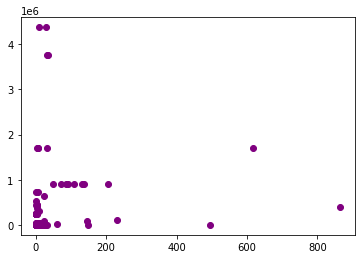

In [7]:
# Plot the relationship between the followers and retweet count

pyplot.scatter(df['retweet_count'], df['followers_count'], c='purple')
pyplot.show()

In [8]:
df.drop(['retweet_count', 'followers_count'], axis=1, inplace=True)
df.head()

,user,text
0,iamSaviourIcon,Saw this at Isolo under bridge this morning 🇳🇬...
1,OdiscoAkin98,Join me as we discuss youth involvement in Pol...
2,evedarl,Nigeria LADY from edo state críed out I can't ...
3,HotNewsNaija,#ENDSARSMEMORIAL: Together - A Poem By Ola Ola...
4,ChimaSteven2,Are you people deaf? No election in Anambra st...


In [9]:
#Stripping off RTs, links and special characters and converting to lower case 

df['text'] = df['text'].apply(lambda x: re.sub(r"RT @\w+: ", '', x))
df['text'] = df['text'].apply(lambda x: re.sub('((www.[^s]+)|(https?://[^s]+))','',x))
df['text'] = df['text'].apply(lambda x: re.sub(r"[^\w\d\s\']+", '', x))
df['text'] = df['text'].str.lower()
df.head()

,user,text
0,iamSaviourIcon,saw this at isolo under bridge this morning \n...
1,OdiscoAkin98,join me as we discuss youth involvement in pol...
2,evedarl,nigeria lady from edo state críed out i can't ...
3,HotNewsNaija,endsarsmemorial together a poem by ola olawal...
4,ChimaSteven2,are you people deaf no election in anambra sta...


### Sentiment Analysis

In [10]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, tweet in df['text'].iteritems():
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    compound = score['compound']

 
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"

    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
 
    elif pos == neg:
        df.loc[index, 'sentiment'] = "neutral"

    df.loc[index, 'negative'] = neg
    df.loc[index, 'neutral'] = neu
    df.loc[index, 'positive'] = pos

df.head(10)



,user,text,polarity,subjectivity,sentiment,negative,neutral,positive
0,iamSaviourIcon,saw this at isolo under bridge this morning \n...,0.000000,0.000000,neutral,0.000,1.000,0.000
1,OdiscoAkin98,join me as we discuss youth involvement in pol...,0.000000,0.000000,positive,0.000,0.845,0.155
2,evedarl,nigeria lady from edo state críed out i can't ...,0.000000,0.000000,neutral,0.000,1.000,0.000
3,HotNewsNaija,endsarsmemorial together a poem by ola olawal...,0.000000,0.000000,neutral,0.000,1.000,0.000
4,ChimaSteven2,are you people deaf no election in anambra sta...,0.000000,0.000000,negative,0.175,0.677,0.147
5,Kennie_Petti,we cheat death everyday until our time is due ...,-0.162500,0.487500,negative,0.365,0.635,0.000
6,tkayose,all things work well for good it's good the en...,0.700000,0.600000,positive,0.000,0.683,0.317
7,Donkelvinsque,october 30 2021\nverse of the day\nfor it is b...,0.285714,0.535714,positive,0.000,0.830,0.170
8,chuchuks86,petersweden7 this is bad so i condemn it compl...,-0.166667,0.488889,negative,0.179,0.685,0.137
9,Olumide_AE,he then told me he was taken to the station at...,0.214286,0.571429,positive,0.000,0.916,0.084


In [11]:
total=df.loc[:,'sentiment'].value_counts(dropna=False)
percentage=round(df.loc[:,'sentiment'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
summary

,Total,Percentage
neutral,531,52.52
negative,260,25.72
positive,220,21.76


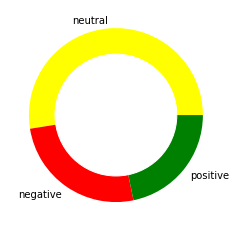

In [12]:
# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','red','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

### Data Processing

In [13]:
#Removing stopwords
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

df['processed_text'] = df['text'].apply(lambda x: cleaning_stopwords(x))

#Removing punctuations
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['processed_text']= df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
df['processed_text'] = df['processed_text'].apply(word_tokenize)

#Applying Stemming
stemming = nltk.PorterStemmer()
def stemmer_on_text(data):
    text = [stemming.stem(word) for word in data]
    return data
df['processed_text'] = df['processed_text'].apply(lambda x: stemmer_on_text(x))

#Applying lemmatizer
lemmatizing = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemmatizing.lemmatize(word) for word in data]
    return data
df['processed_text'] = df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user,text,polarity,subjectivity,sentiment,negative,neutral,positive,processed_text
0,iamSaviourIcon,saw this at isolo under bridge this morning \n...,0.0,0.0,neutral,0.000,1.000,0.000,"[saw, isolo, bridge, morning, endsarsmemorial,..."
1,OdiscoAkin98,join me as we discuss youth involvement in pol...,0.0,0.0,positive,0.000,0.845,0.155,"[join, discuss, youth, involvement, politics, ..."
2,evedarl,nigeria lady from edo state críed out i can't ...,0.0,0.0,neutral,0.000,1.000,0.000,"[nigeria, lady, edo, state, críed, cant, ķíľľ,..."
3,HotNewsNaija,endsarsmemorial together a poem by ola olawal...,0.0,0.0,neutral,0.000,1.000,0.000,"[endsarsmemorial, together, poem, ola, olawale]"
4,ChimaSteven2,are you people deaf no election in anambra sta...,0.0,0.0,negative,0.175,0.677,0.147,"[people, deaf, election, anambra, state, infac..."


In [15]:
# To plot my word clouds, it expects a string and not a list

df['processed_text_string'] = df['processed_text'].apply(lambda x: ','.join(str(v) for v in x))


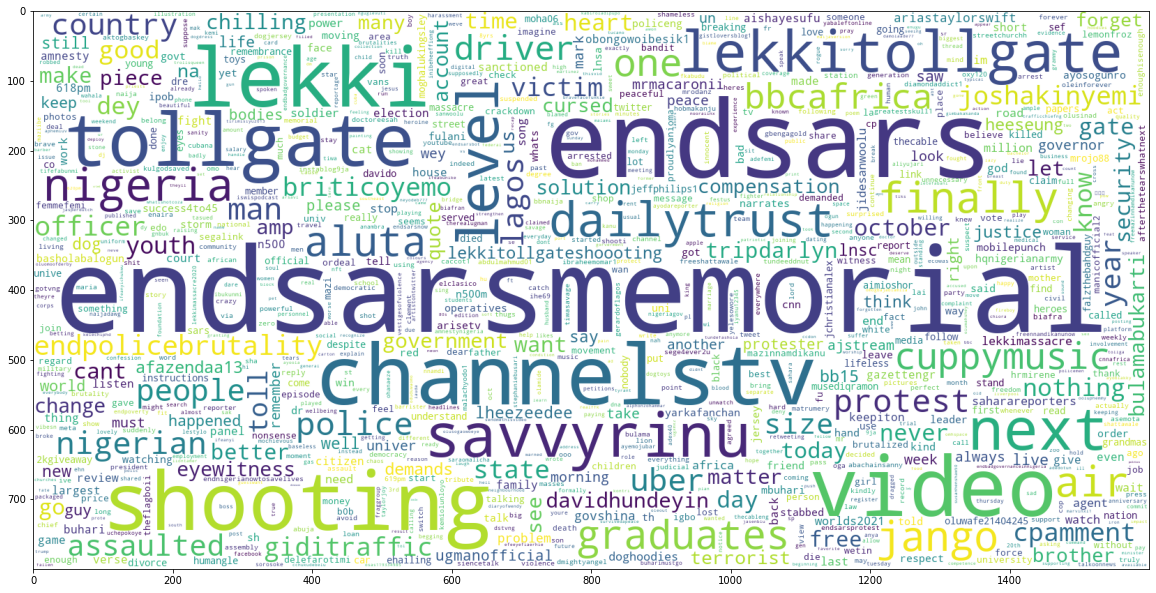

In [16]:
# WordCloud for all words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(df['processed_text_string']))
plt.imshow(wc)

In [17]:
#Creating new data frames for all sentiments (positive, negative and neutral)
df_negative = df[df['sentiment']=='negative']
df_positive = df[df['sentiment']=='positive']
df_neutral = df[df['sentiment']=='neutral']

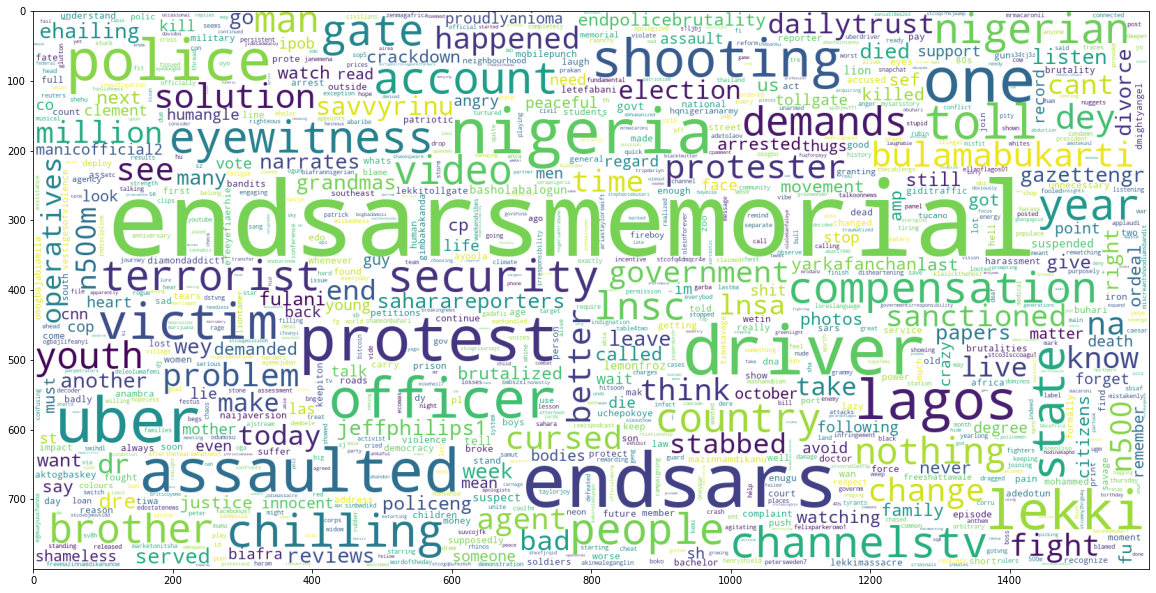

In [18]:
# WordCloud for negative sentiments
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white', 
               collocations=False).generate(" ".join(df_negative['processed_text_string']))
plt.imshow(wc)

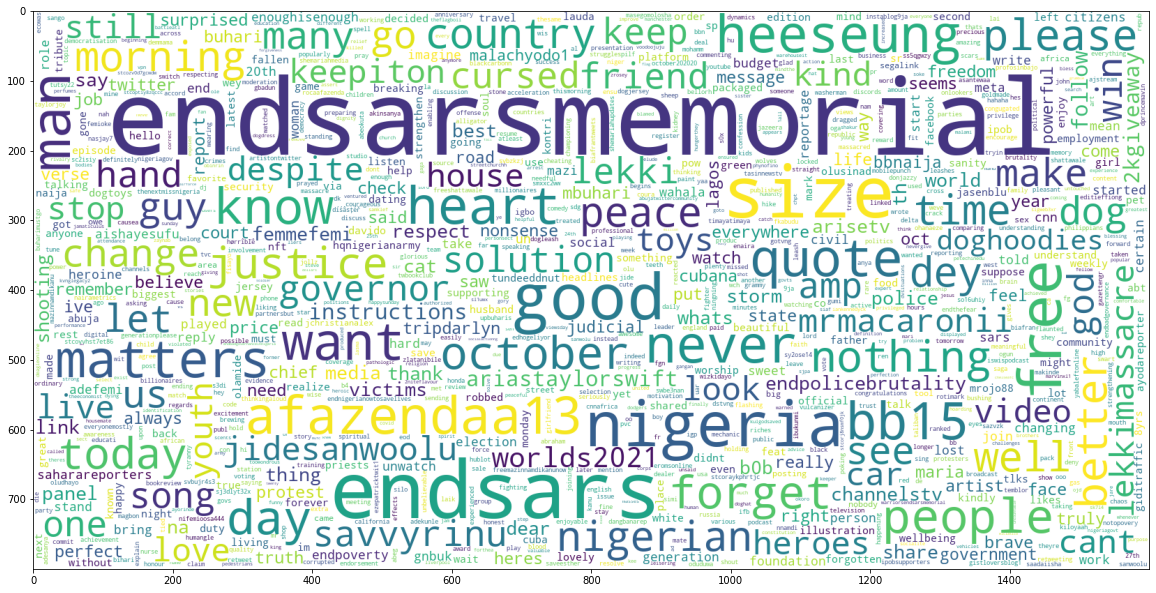

In [19]:
# WordCloud for positive sentiments
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(df_positive['processed_text_string']))
plt.imshow(wc)

### Analysing Word Frequency Count

In [20]:
#Flatten the list of tweets
single_words = [list(tweet) for tweet in df['processed_text']]
unigram = list(itertools.chain(*single_words))
unigram_count = collections.Counter(unigram)

#Selecting the top 10 words
unigram_df = pd.DataFrame(unigram_count.most_common(10), columns=['unigram', 'count'])
unigram_df

,unigram,count
0,endsarsmemorial,472
1,endsars,389
2,channelstv,220
3,video,211
4,lekki,210
5,shooting,199
6,tollgate,168
7,savvyrinu,114
8,next,105
9,lekkitollgate,98


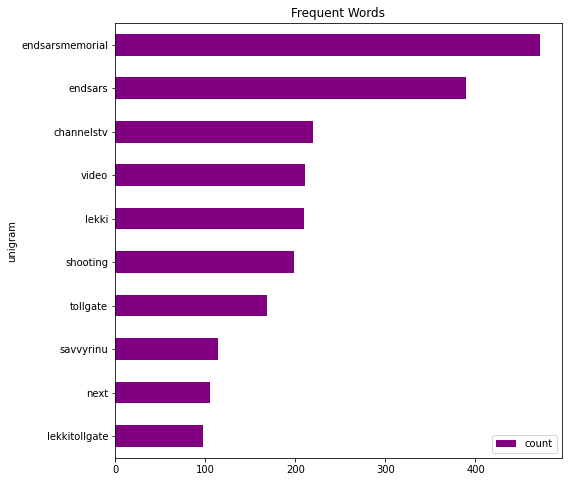

In [21]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))

unigram_df.sort_values(by='count').plot.barh(x='unigram', y='count', ax=ax, color="purple")

ax.set_title("Frequent Words")

plt.show()

### Analysing Co-occurrence and Network of Words (Bigrams)

In [22]:
words_bigram = [list(bigrams(tweet)) for tweet in df['processed_text']]


# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*words_bigram))

# Create counter of words in clean bigrams
bigram_count = collections.Counter(bigrams)

bigram_df = pd.DataFrame(bigram_count.most_common(100), columns=['bigram', 'count'])

bigram_df.head()

,bigram,count
0,"(channelstv, video)",189
1,"(video, endsars)",187
2,"(endsars, shooting)",178
3,"(shooting, lekki)",171
4,"(lekki, tollgate)",168


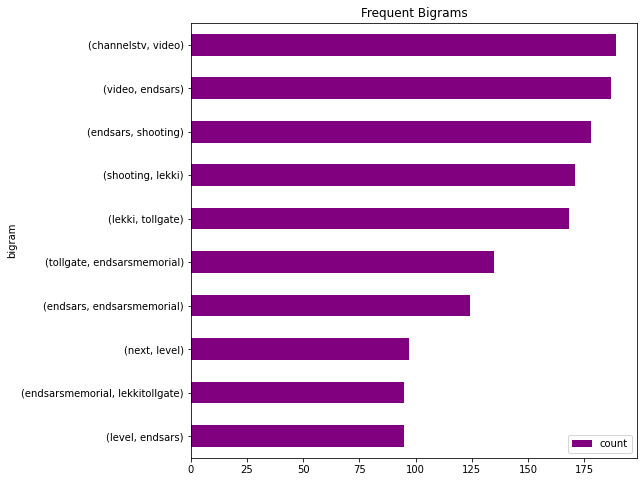

In [23]:
# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))

bigram_df[:10].sort_values(by='count').plot.barh(x='bigram', y='count', ax=ax, color="purple")

ax.set_title("Frequent Bigrams")

plt.show()

In [30]:
# Create dictionary of bigrams and their counts
dic = bigram_df[:20].set_index('bigram').T.to_dict('records')

In [31]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in dic[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))


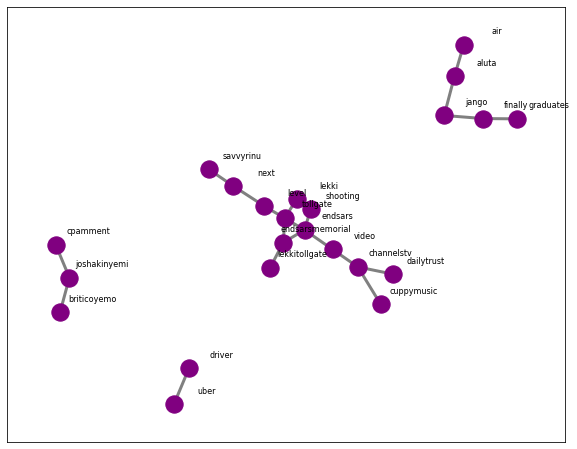

In [32]:
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y, s=key, horizontalalignment='center', fontsize=8)
    
plt.show()